In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('loan.csv')

In [3]:
data = data.dropna()

In [4]:
encoder = LabelEncoder()
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'Loan_Status':
        data[col] = encoder.fit_transform(data[col])

In [5]:
loan_status_encoder = LabelEncoder()
data['Loan_Status'] = loan_status_encoder.fit_transform(data['Loan_Status'])

In [6]:
x= data.drop(columns=['Loan_Status'])
y=data['Loan_Status']

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [8]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=2, random_state=42)

In [9]:
data['Cluster'] = kmeans.labels_

In [10]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

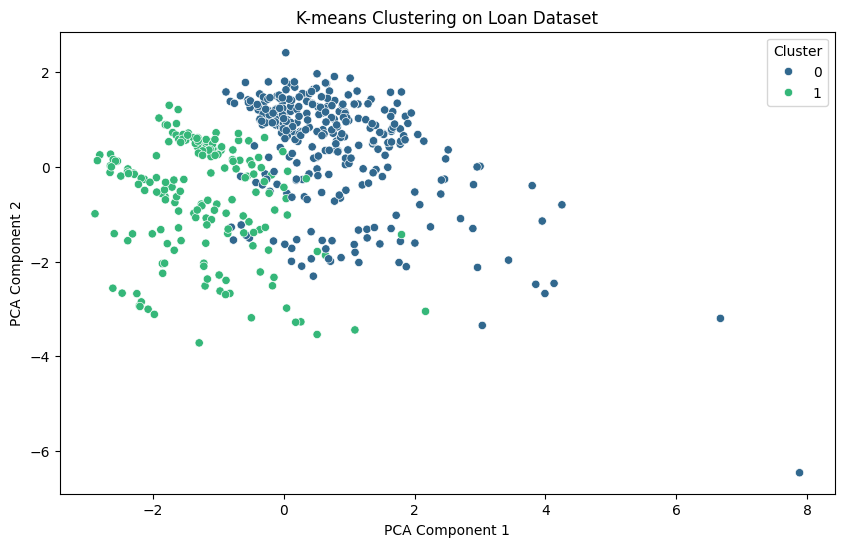

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=data['Cluster'], palette="viridis")
plt.title('K-means Clustering on Loan Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()